In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle datasets download -d rtatman/cmu-pronouncing-dictionary

  0% 0.00/904k [00:00<?, ?B/s]
100% 904k/904k [00:00<00:00, 153MB/s]


In [5]:
!unzip *.zip

Archive:  cmu-pronouncing-dictionary.zip
  inflating: LICENSE.txt             
  inflating: cmudict.dict            
  inflating: cmudict.phones          
  inflating: cmudict.symbols         
  inflating: cmudict.vp              


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [7]:
words = []
phonics_list = []
dict_file = open('/content/cmudict.dict', 'r')
with dict_file as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
        x = p.split(' ')
        words.append(x[0])
        phonics_list.append(' '.join(x[1:]))
data = pd.DataFrame({'Word': words, 'Phonics': phonics_list})
data.head()

Word    Phonics
0    'bout    B AW1 T
1   'cause    K AH0 Z
2  'course  K AO1 R S
3    'cuse  K Y UW1 Z
4      'em      AH0 M

In [9]:
data.shape

(135010, 2)

In [10]:
data.sample(10)

Word                         Phonics
103800    rosendale           R OW1 Z AH0 N D EY2 L
4021       anderegg               AE1 N D ER0 IH0 G
16896      bushings               B UH1 SH IH0 NG Z
47355   gentlewomen  JH EH1 N T AH0 L W IH2 M AH0 N
89841        partin                 P AA1 R T IH0 N
119790   taxonomies     T AE2 K S AO1 N AH0 M IY2 Z
125565   unilever's       Y UW2 N IH0 L IY1 V ER0 Z
47912       giesler               G IY1 S AH0 L ER0
14512          bram                       B R AE1 M
131609        wiers                       W IY1 R Z

In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 's': 4, 'l': 5, 't': 6, 'r': 7, 'k': 8, 'd': 9, 'ih0': 10, 'm': 11, 'z': 12, 'er0': 13, 'iy0': 14, 'b': 15, 'eh1': 16, 'p': 17, 'aa1': 18, 'ae1': 19, 'ih1': 20, 'f': 21, 'g': 22, 'v': 23, 'iy1': 24, 'ng': 25, 'hh': 26, 'ey1': 27, 'w': 28, 'sh': 29, 'ow1': 30, 'ow0': 31, 'ao1': 32, 'ay1': 33, 'ah1': 34, 'uw1': 35, 'jh': 36, 'y': 37, 'aa0': 38, 'ch': 39, 'er1': 40, 'ih2': 41, 'eh2': 42, 'ey2': 43, 'ae2': 44, 'ay2': 45, 'aa2': 46, 'th': 47, 'eh0': 48, 'iy2': 49, 'ow2': 50, 'aw1': 51, 'uw0': 52, 'ao2': 53, 'ae0': 54, 'uh1': 55, 'ao0': 56, 'ay0': 57, 'uw2': 58, 'ah2': 59, 'ey0': 60, 'oy1': 61, 'aw2': 62, 'er2': 63, 'dh': 64, 'zh': 65, 'uh2': 66, 'aw0': 67, 'uh0': 68, 'oy2': 69, 'oy0': 70, 'foreign': 71, 'french': 72, 'abbrev': 73, 'name': 74, 'old': 75}


In [13]:
data = data[~data['Phonics'].str.contains('#')].reset_index(drop=True)
data.sample(10)

Word                          Phonics
79572            mirv                          M ER1 V
56559            hopp                         HH AA1 P
107706          scram                      S K R AE1 M
56465            hoof                         HH UW1 F
37967   endangered(2)           IH0 N D EY1 N JH ER0 D
112815           soap                          S OW1 P
80730     monopolizes  M AH0 N AA1 P AH0 L AY2 Z IH0 Z
3158        alsace(2)                    AE0 L S AE1 S
88814     packages(2)             P AE1 K IH0 JH IH0 Z
99117        receptor              R IY0 S EH1 P T ER0

In [57]:

df = data.sample(1000).reset_index(drop=True)
df.shape

(1000, 2)

In [58]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 'l': 4, 's': 5, 't': 6, 'r': 7, 'k': 8, 'd': 9, 'ih0': 10, 'm': 11, 'z': 12, 'p': 13, 'eh1': 14, 'er0': 15, 'b': 16, 'iy0': 17, 'ae1': 18, 'ih1': 19, 'aa1': 20, 'f': 21, 'g': 22, 'v': 23, 'w': 24, 'iy1': 25, 'ng': 26, 'sh': 27, 'ow0': 28, 'ey1': 29, 'ao1': 30, 'jh': 31, 'ay1': 32, 'ow1': 33, 'hh': 34, 'ah1': 35, 'aa0': 36, 'er1': 37, 'uw1': 38, 'ch': 39, 'ey2': 40, 'y': 41, 'ih2': 42, 'eh0': 43, 'aa2': 44, 'iy2': 45, 'eh2': 46, 'th': 47, 'ow2': 48, 'ay2': 49, 'ae2': 50, 'ao0': 51, 'aw1': 52, 'uh1': 53, 'ao2': 54, 'ae0': 55, 'oy1': 56, 'ey0': 57, 'ay0': 58, 'uw0': 59, 'uw2': 60, 'er2': 61, 'uh0': 62, 'ah2': 63, 'zh': 64, 'dh': 65, 'aw0': 66, 'oy0': 67, 'oy2': 68, 'uh2': 69, 'aw2': 70}


In [59]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length

71

In [60]:
sequences = tokenizer.texts_to_sequences(df['Phonics'].values)
print(sequences[:5])

[[30, 21, 42, 4], [5, 25, 21, 60, 9], [31, 14, 5, 2, 11, 10, 3], [6, 32, 22, 44, 7, 6], [8, 36, 7, 4, 25, 6, 28]]


In [61]:
longest_sentence = len(max(sequences, key=len))
longest_sentence

15

In [62]:
padded_phonics = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
print(padded_phonics[:5])

[[30 21 42  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 25 21 60  9  0  0  0  0  0  0  0  0  0  0]
 [31 14  5  2 11 10  3  0  0  0  0  0  0  0  0]
 [ 6 32 22 44  7  6  0  0  0  0  0  0  0  0  0]
 [ 8 36  7  4 25  6 28  0  0  0  0  0  0  0  0]]


In [63]:
len(df['Word'].unique())

1000

In [64]:
embedding_dim = 10
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    tf.keras.layers.LSTM(256, activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(df['Word'].unique()), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 10)            710       
                                                                 
 lstm (LSTM)                 (None, 15, 256)           273408    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1000)              65000     
                                                                 
Total params: 544,494
Trainable params: 544,494
Non-trainable params: 0
_________________________________________________________________


In [65]:
y = df['Word'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
history = model.fit(padded_phonics, encoded_y, epochs=100, verbose=1)
model.evaluate(padded_phonics, encoded_y)

Epoch 1/100
32/32 [==============================] - 57s 6ms/step - loss: 6.9146 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9099 - accuracy: 0.0010
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9096 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9097 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9099 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9094 - accuracy: 0.0010
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9095 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9101 - accuracy: 0.0010
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9097 - accuracy: 0.0010
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 6.9096 - accur

[0.5770752429962158, 0.8429999947547913]

In [24]:
df.head(10)

Word               Phonics
0  stranded   S T R AE1 N D IH0 D
1    gimbel       G IH1 M B AH0 L
2   closser         K L AO1 S ER0
3     compu       K AA1 M P Y UW0
4     koral         K AO1 R AH0 L
5  rockette         R AA0 K EH1 T
6   pharaoh           F EH1 R OW0
7    ridner         R IH1 D N ER0
8     certo        CH EH1 R T OW0
9   tanguma  T AA0 NG G UW1 M AH0

In [25]:
word_prob = model.predict(padded_phonics[6].reshape(1, -1))
word_pred = np.argmax(word_prob, axis=1)
word_pred = encoder.inverse_transform(word_pred)
word_pred

array(['pharaoh'], dtype=object)

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [27]:
embedding_weights = np.array(model.get_weights()[0])[:-1]
pca  = PCA(2)
pca_x = pca.fit_transform(embedding_weights)
pca_x = pd.DataFrame(pca_x, columns=['PCA1', 'PCA2'])
pca_x['Phonemes'] = word_index.keys()
pca_x.head()

PCA1      PCA2 Phonemes
0  0.422917 -0.147909    <OOV>
1 -0.001901 -0.025783      ah0
2 -0.372723  0.040814        n
3 -0.233175 -0.030009        t
4 -0.680694  0.065960        l

In [28]:
pca_x['clean_Phonemes'] = pca_x['Phonemes'].apply(lambda x: re.sub("[^a-zA-Z<>]","",x))
pca_x.head()

PCA1      PCA2 Phonemes clean_Phonemes
0  0.422917 -0.147909    <OOV>          <OOV>
1 -0.001901 -0.025783      ah0             ah
2 -0.372723  0.040814        n              n
3 -0.233175 -0.030009        t              t
4 -0.680694  0.065960        l              l

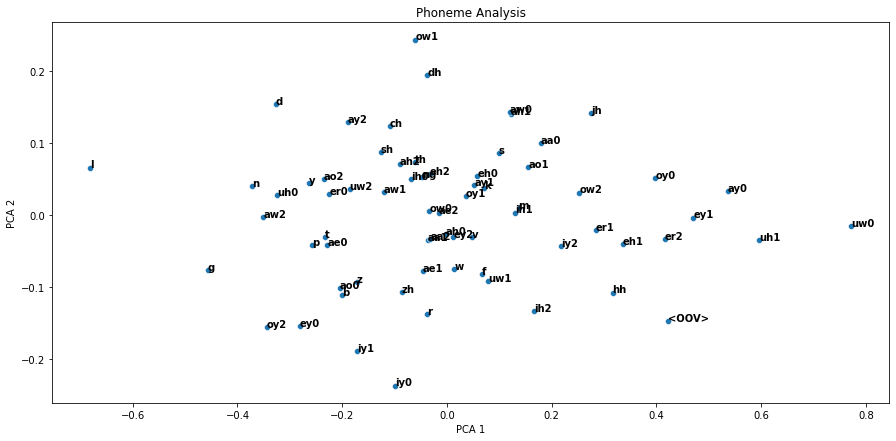

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_x, x='PCA1', y='PCA2')
for line in range(0, pca_x.shape[0]):
     plt.text(pca_x.PCA1[line], pca_x.PCA2[line], pca_x.Phonemes[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Phoneme Analysis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [30]:
phonemes_list = []
phonics_type_list = []
ptype_file = open('/content/cmudict.phones', 'r')
with ptype_file as f:
    phonics = [line.rstrip('\n') for line in f]
    for p in phonics:
        x = p.split('\t')
        phonemes_list.append(x[0].lower())
        phonics_type_list.append(x[1])
ptype_df = pd.DataFrame({'clean_Phonemes': phonemes_list, 'Type': phonics_type_list})
ptype_df.head()

clean_Phonemes   Type
0             aa  vowel
1             ae  vowel
2             ah  vowel
3             ao  vowel
4             aw  vowel

In [31]:
pca_x2 = pd.merge(pca_x, ptype_df, how='inner')
pca_x2.head()

PCA1      PCA2 Phonemes clean_Phonemes   Type
0 -0.001901 -0.025783      ah0             ah  vowel
1  0.121621  0.140126      ah1             ah  vowel
2 -0.089812  0.071162      ah2             ah  vowel
3 -0.372723  0.040814        n              n  nasal
4 -0.233175 -0.030009        t              t   stop

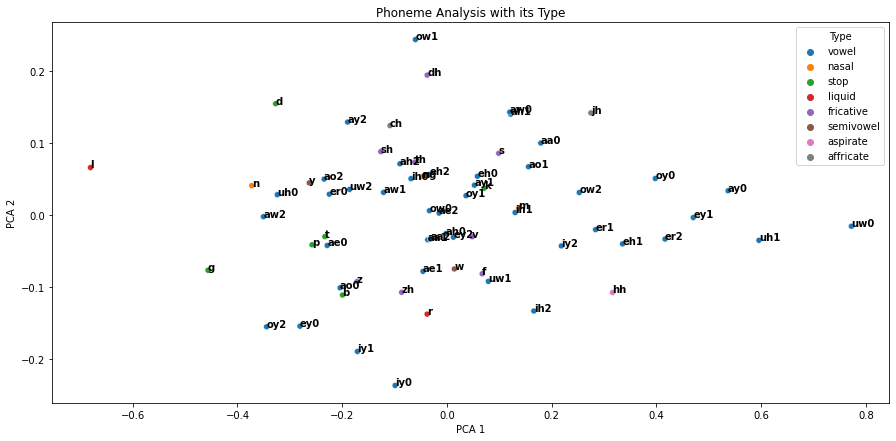

In [32]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=pca_x2, x='PCA1', y='PCA2', hue='Type')
for line in range(0, pca_x2.shape[0]):
     plt.text(pca_x2.PCA1[line], pca_x2.PCA2[line], pca_x2.Phonemes[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Phoneme Analysis with its Type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Trying Words to Phonemes

In [67]:
df1 = data.sample(5000).reset_index(drop=True)
df1.shape

(5000, 2)

In [68]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['Phonics'].values)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'ah0': 2, 'n': 3, 's': 4, 't': 5, 'l': 6, 'r': 7, 'k': 8, 'd': 9, 'ih0': 10, 'm': 11, 'z': 12, 'er0': 13, 'iy0': 14, 'b': 15, 'eh1': 16, 'p': 17, 'aa1': 18, 'ae1': 19, 'ih1': 20, 'f': 21, 'g': 22, 'v': 23, 'ng': 24, 'iy1': 25, 'hh': 26, 'ey1': 27, 'ow1': 28, 'sh': 29, 'w': 30, 'ow0': 31, 'ao1': 32, 'ay1': 33, 'uw1': 34, 'ah1': 35, 'jh': 36, 'y': 37, 'aa0': 38, 'ih2': 39, 'ch': 40, 'eh2': 41, 'er1': 42, 'aa2': 43, 'ey2': 44, 'ae2': 45, 'th': 46, 'eh0': 47, 'iy2': 48, 'ay2': 49, 'ow2': 50, 'aw1': 51, 'uh1': 52, 'uw0': 53, 'ao2': 54, 'ae0': 55, 'ao0': 56, 'uw2': 57, 'ah2': 58, 'ey0': 59, 'ay0': 60, 'oy1': 61, 'aw2': 62, 'dh': 63, 'zh': 64, 'er2': 65, 'uh2': 66, 'aw0': 67, 'uh0': 68, 'oy0': 69, 'oy2': 70}


In [69]:
vocab_length = len(tokenizer.word_index) + 1
vocab_length
sequences = tokenizer.texts_to_sequences(df['Phonics'].values)
print(sequences[:5])
longest_sentence = len(max(sequences, key=len))
longest_sentence
padded_phonics = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
print(padded_phonics[:5])
len(df['Word'].unique())

[[9, 10, 4, 40, 16, 3, 12, 38], [4, 8, 35, 6, 37, 2, 3], [4, 25, 15, 13, 22], [9, 25, 6, 12], [21, 35, 4, 5, 38, 8]]
[[ 9 10  4 40 16  3 12 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 4  8 35  6 37  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 4 25 15 13 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 9 25  6 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [21 35  4  5 38  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]]


5000

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,Embedding
from tensorflow.keras.optimizers import SGD

In [92]:
tf.keras.backend.clear_session()
regressor = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    GRU(units=512, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    GRU(units=256, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    GRU(units=128, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    GRU(units=64, activation='tanh'),
    Dropout(0.2),
    Dense(len(df['Word'].unique()), activation='softmax')
])

regressor.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
y = df['Word'].values
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
history = regressor.fit(padded_phonics, encoded_y, epochs=1000, verbose=1)
regressor.evaluate(padded_phonics, encoded_y)

Epoch 1/1000
157/157 [==============================] - 9s 14ms/step - loss: 8.5304 - accuracy: 0.0000e+00
Epoch 2/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5367 - accuracy: 0.0000e+00
Epoch 3/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5444 - accuracy: 0.0000e+00
Epoch 4/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5505 - accuracy: 0.0000e+00
Epoch 5/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5488 - accuracy: 0.0000e+00
Epoch 6/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5395 - accuracy: 0.0000e+00
Epoch 7/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5398 - accuracy: 0.0000e+00
Epoch 8/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5362 - accuracy: 0.0000e+00
Epoch 9/1000
157/157 [==============================] - 2s 14ms/step - loss: 8.5340 - accuracy: 0.0000e+00
Epoch 10/1000
157/157 [==============

[1.3745357990264893, 0.5306000113487244]